## Assignment 2 Machine Learning - 52255

In [2]:
#setting the right directory for my local machine
import os
os.chdir(r"C:\Users\Basti\OneDrive\Desktop\Master\NOVA SBE\S2\T1\ML\Assignment 2")

### Question 1 (3 points)
SmartRetail’s marketing team is eager to better understand customer behaviour before implementing AI-driven solutions. Currently, the company lacks visibility into how different customer segments interact with its platform. Without these insights, marketing efforts remain inefficient and untargeted. A thorough data exploration process is required to uncover trends, which will form the foundation for segmentation and predictive modelling efforts. Generate visualizations (bar charts, histograms, heatmaps) to detect trends and summarize the main customer spending patterns & engagement trends.

In [1]:
#first look at the dataset
import pandas as pd
import numpy as np
df = pd.read_csv("SmartRetail_dataset.csv")
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [3]:
print(df.shape)
df.info()

(3900, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 

In [4]:
df.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns
unique_counts = df[categorical_cols].nunique()

print(unique_counts)

Gender                     2
Item Purchased            25
Category                   4
Location                  50
Size                       4
Color                     25
Season                     4
Subscription Status        2
Shipping Type              6
Discount Applied           2
Promo Code Used            2
Payment Method             6
Frequency of Purchases     7
dtype: int64


From this first exploration, we can gain initial knowledge:
 - No missing values
 - Dataset includes numerical, categorical, and boolean data types
 - Summary Statistics for Numerical Columns
    - Age ranges from 18 to 70 years with an average of 44 years
    - Purchase Amount (USD) varies from $20 to $100, with an average of $59.76
    - Review Ratings range from 2.5 to 5.0, with an average of 3.75
    - Previous Purchases range from 1 to 50, indicating varying customer engagement levels
 - Categorical Data Insights
    - Gender: Only 2 unique values (Male/Female)
    - Item Purchased: 25 different products are included
    - Category: 4 unique categories (likely Clothing, Footwear, etc.)
    - Location: Customers are spread across 50 locations
    - Shipping Types: 6 different options exist
    - Subscription Status: Binary (Yes/No)
    - Promo Code: Binay (Yes/No)
    - Payment Methods: 6 options
    - Purchase Frequency: Customers shop Weekly, Monthly, Annually, etc.


The average customer is a man of 44 years, spending on average about $60 and generally likes the products/company (average rating of 3.75). 

C:\Users\Basti\AppData\Local\Temp\ipykernel_11632\3068089765.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Gender'], palette= "magma")


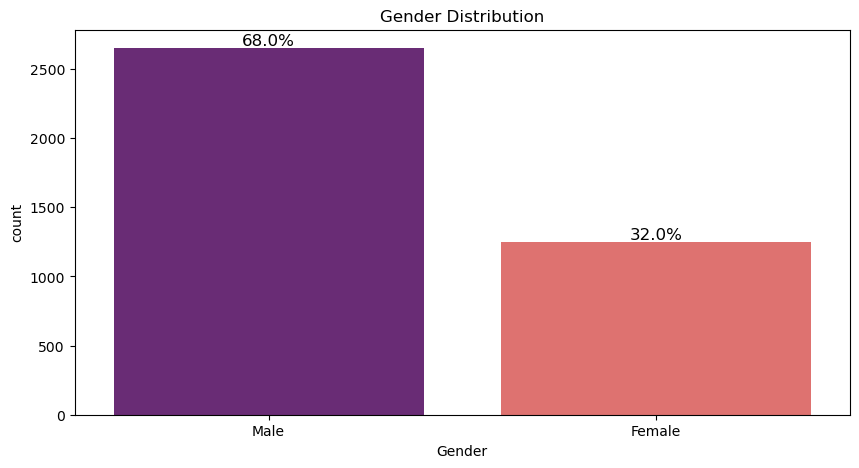

C:\Users\Basti\AppData\Local\Temp\ipykernel_11632\3068089765.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Category'], order=df['Category'].value_counts().index, palette= "viridis")


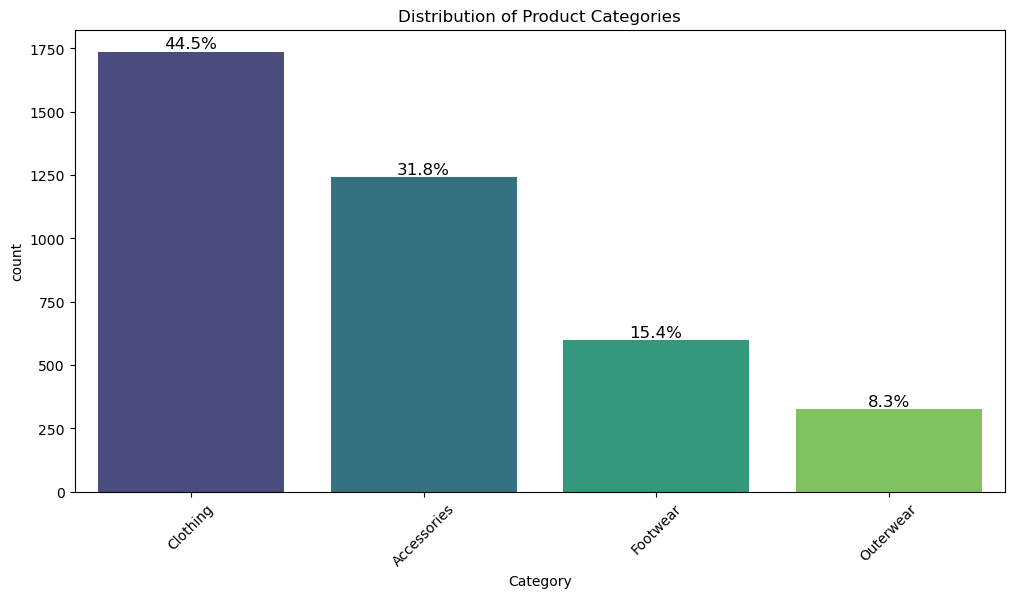

C:\Users\Basti\AppData\Local\Temp\ipykernel_11632\3068089765.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Season'], order=df['Season'].value_counts().index, palette = "magma")


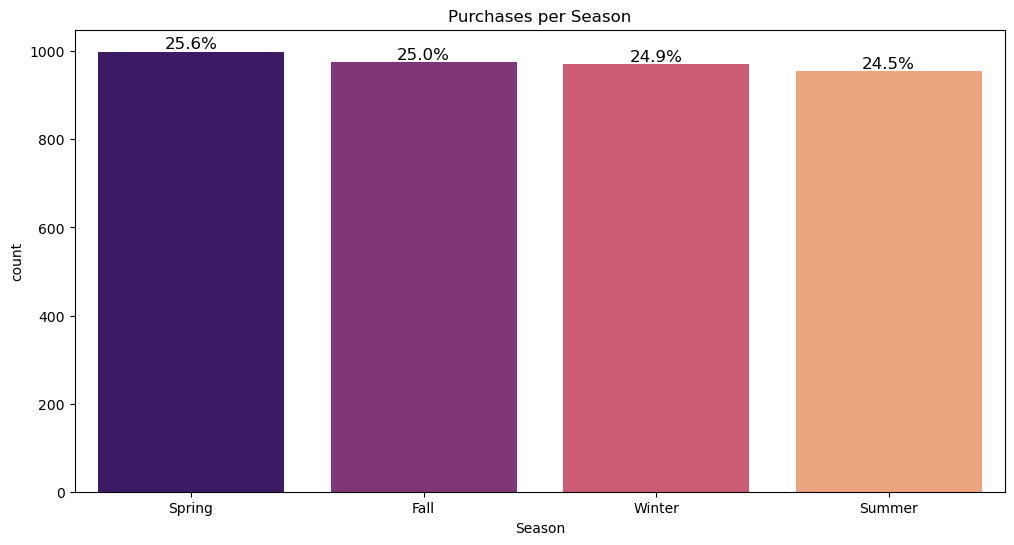

C:\Users\Basti\AppData\Local\Temp\ipykernel_11632\3068089765.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Shipping Type'], order=df['Shipping Type'].value_counts().index, palette = "Spectral")


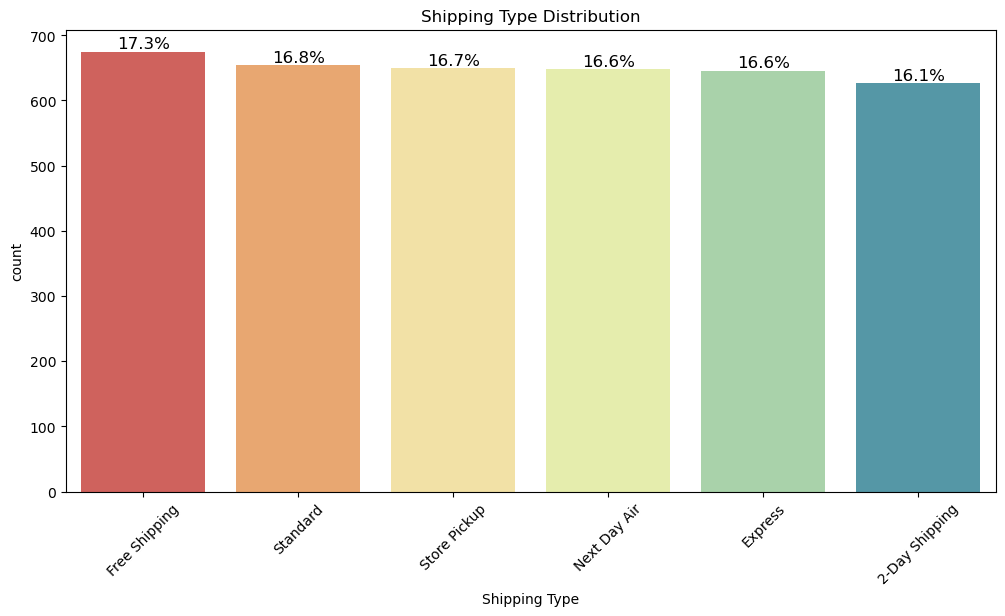

C:\Users\Basti\AppData\Local\Temp\ipykernel_11632\3068089765.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Payment Method'], order=df['Payment Method'].value_counts().index, palette = "viridis")


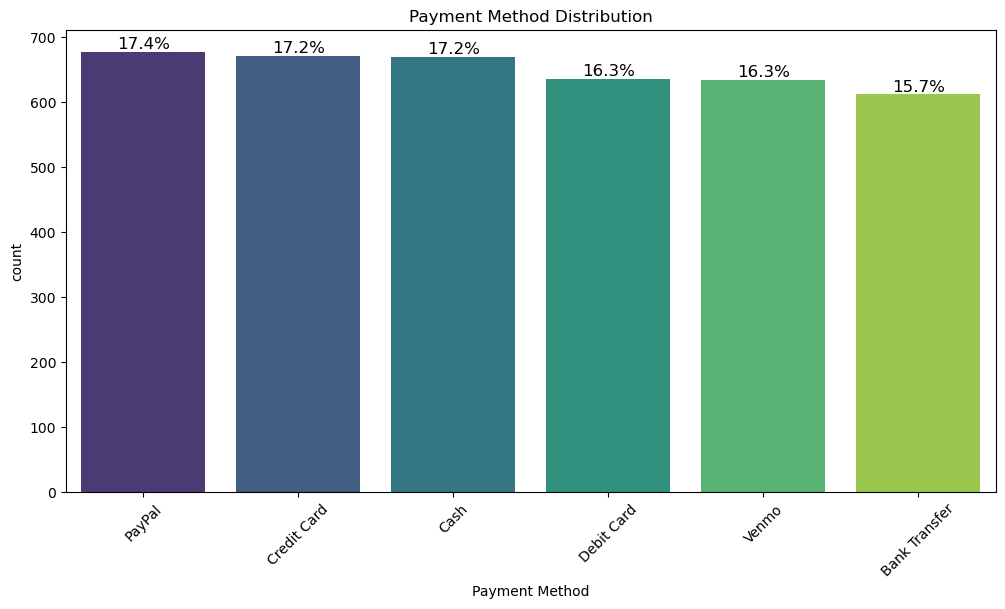

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Function to add percentage labels on count plots
def add_percentage(ax, total):
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, color='black')

# Total number of entries in the dataset
total_entries = len(df)

# Gender Distribution
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df['Gender'], palette= "magma")
plt.title("Gender Distribution")
add_percentage(ax, total_entries)
plt.show()

# Distribution of Product Categories
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=df['Category'], order=df['Category'].value_counts().index, palette= "viridis")
plt.title("Distribution of Product Categories")
plt.xticks(rotation=45)
add_percentage(ax, total_entries)
plt.show()

# Purchases per Season
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=df['Season'], order=df['Season'].value_counts().index, palette = "magma")
plt.title("Purchases per Season")
add_percentage(ax, total_entries)
plt.show()

# Shipping Type Distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=df['Shipping Type'], order=df['Shipping Type'].value_counts().index, palette = "Spectral")
plt.title("Shipping Type Distribution")
plt.xticks(rotation=45)
add_percentage(ax, total_entries)
plt.show()

# Payment Method Distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=df['Payment Method'], order=df['Payment Method'].value_counts().index, palette = "viridis")
plt.title("Payment Method Distribution")
plt.xticks(rotation=45)
add_percentage(ax, total_entries)
plt.show()


Customers are mainly men (68%) and the most important product category in terms of sales is Clothing (44.5%).

C:\Users\Basti\AppData\Local\Temp\ipykernel_24964\797626475.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['Item Purchased'].value_counts().index,


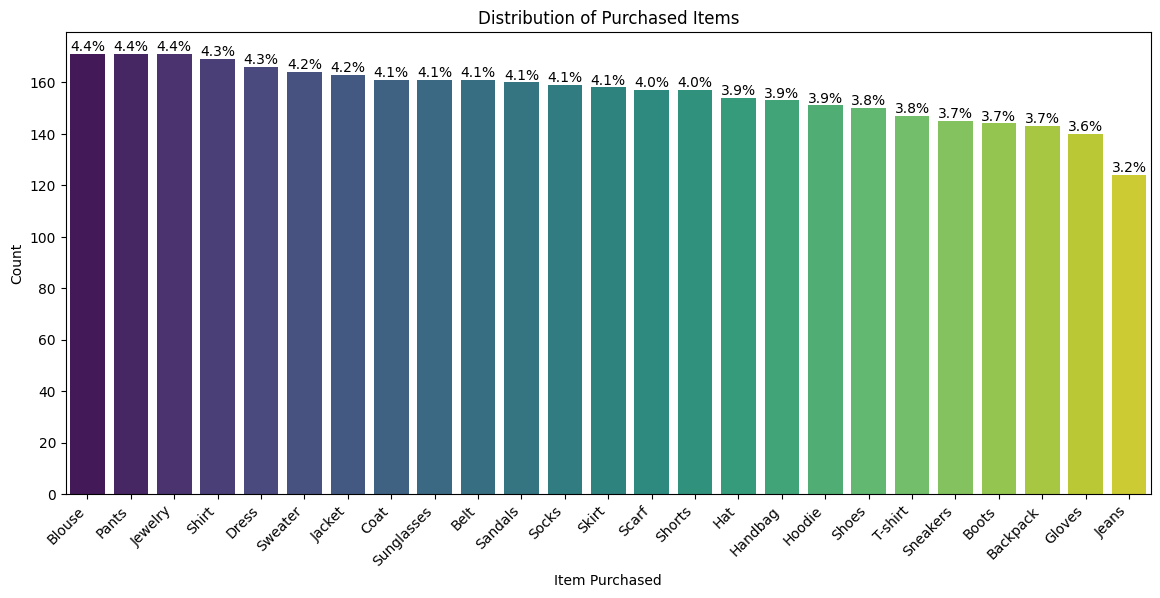

C:\Users\Basti\AppData\Local\Temp\ipykernel_24964\797626475.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_locations.index, y=top_locations.values, palette="magma")


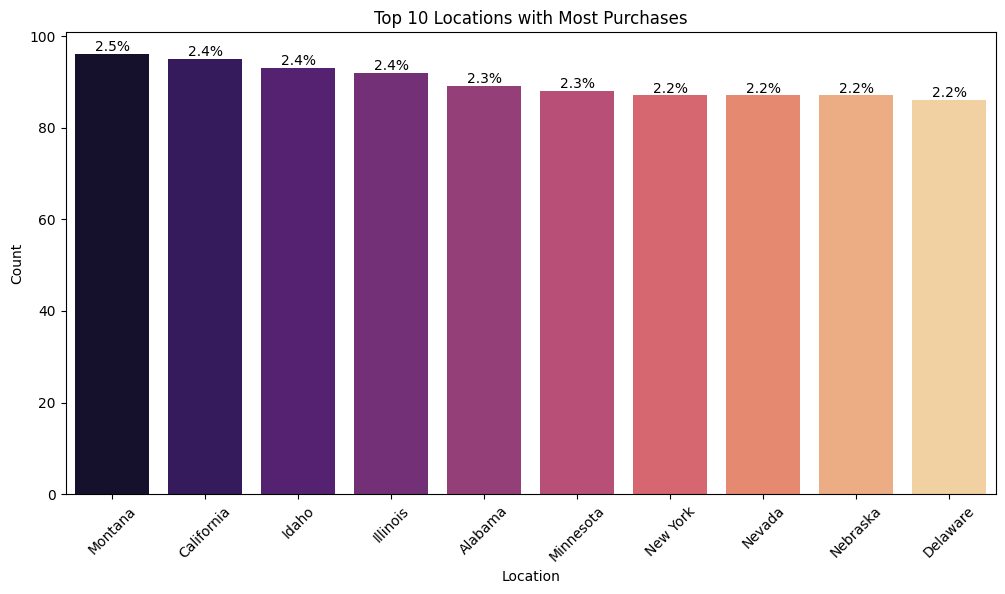

C:\Users\Basti\AppData\Local\Temp\ipykernel_24964\797626475.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Size'], order=df['Size'].value_counts().index, palette="coolwarm")


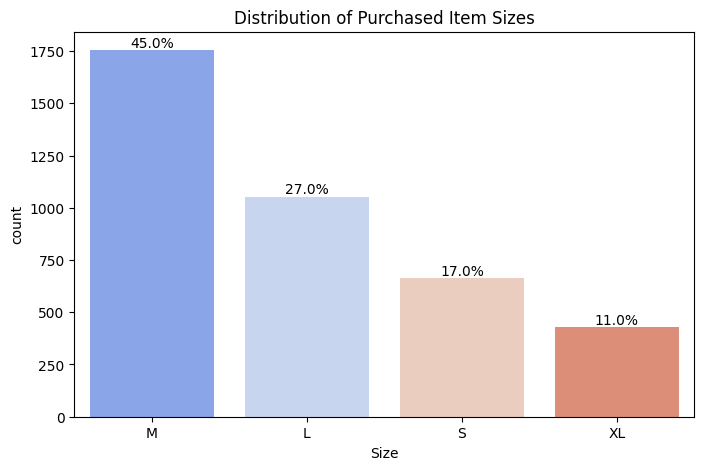

C:\Users\Basti\AppData\Local\Temp\ipykernel_24964\797626475.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_colors.index, y=top_colors.values, palette="Spectral")


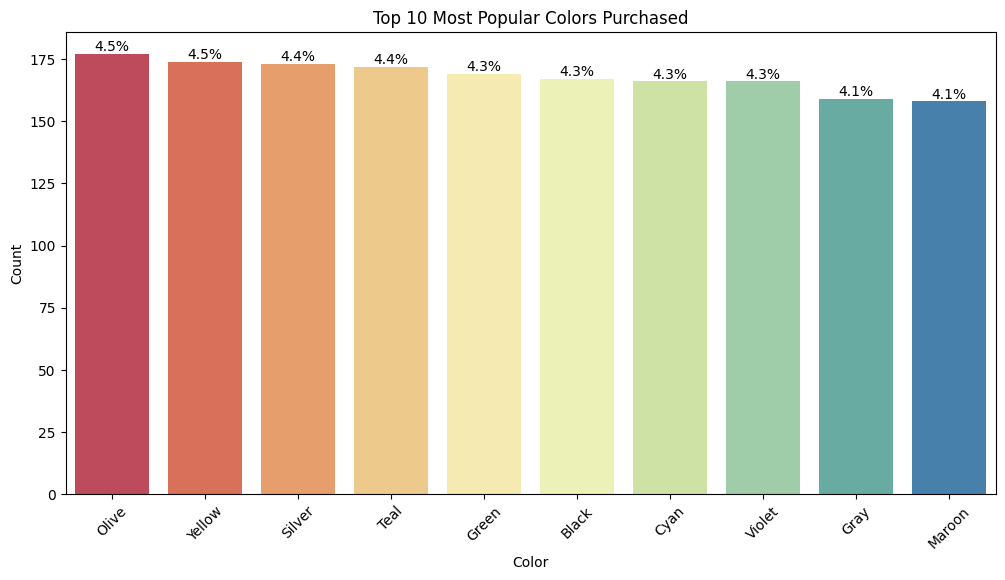

In [7]:
# Reloading necessary libraries
import pandas as pd
import seaborn as sns

# Function to add percentage labels on count plots
def add_percentage(ax, total):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Avoid division by zero
            percentage = f'{100 * height / total:.1f}%'
            ax.annotate(percentage, 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=10, color='black')

# Total number of entries in the dataset
total_entries = len(df)

# Bar plot for all 25 purchased items
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=df['Item Purchased'].value_counts().index, 
                 y=df['Item Purchased'].value_counts().values, palette="viridis")
plt.title("Distribution of Purchased Items")
plt.xlabel("Item Purchased")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
add_percentage(ax, total_entries)
plt.show()

# Top 10 locations with most purchases
top_locations = df['Location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_locations.index, y=top_locations.values, palette="magma")
plt.title("Top 10 Locations with Most Purchases")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
add_percentage(ax, total_entries)
plt.show()

# Distribution of size preferences
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['Size'], order=df['Size'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Purchased Item Sizes")
add_percentage(ax, total_entries)
plt.show()

# Top 10 most popular colors purchased
top_colors = df['Color'].value_counts().head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_colors.index, y=top_colors.values, palette="Spectral")
plt.title("Top 10 Most Popular Colors Purchased")
plt.xlabel("Color")
plt.ylabel("Count")
plt.xticks(rotation=45)
add_percentage(ax, total_entries)
plt.show()


Except for the Purchased Size distribution, where "M" is the most preferred, most variables exhibit a uniform distribution. This suggests that customers shop evenly across different categories, colors, and locations, without a strong preference for any particular option.

Let's now explore the numerical variables!

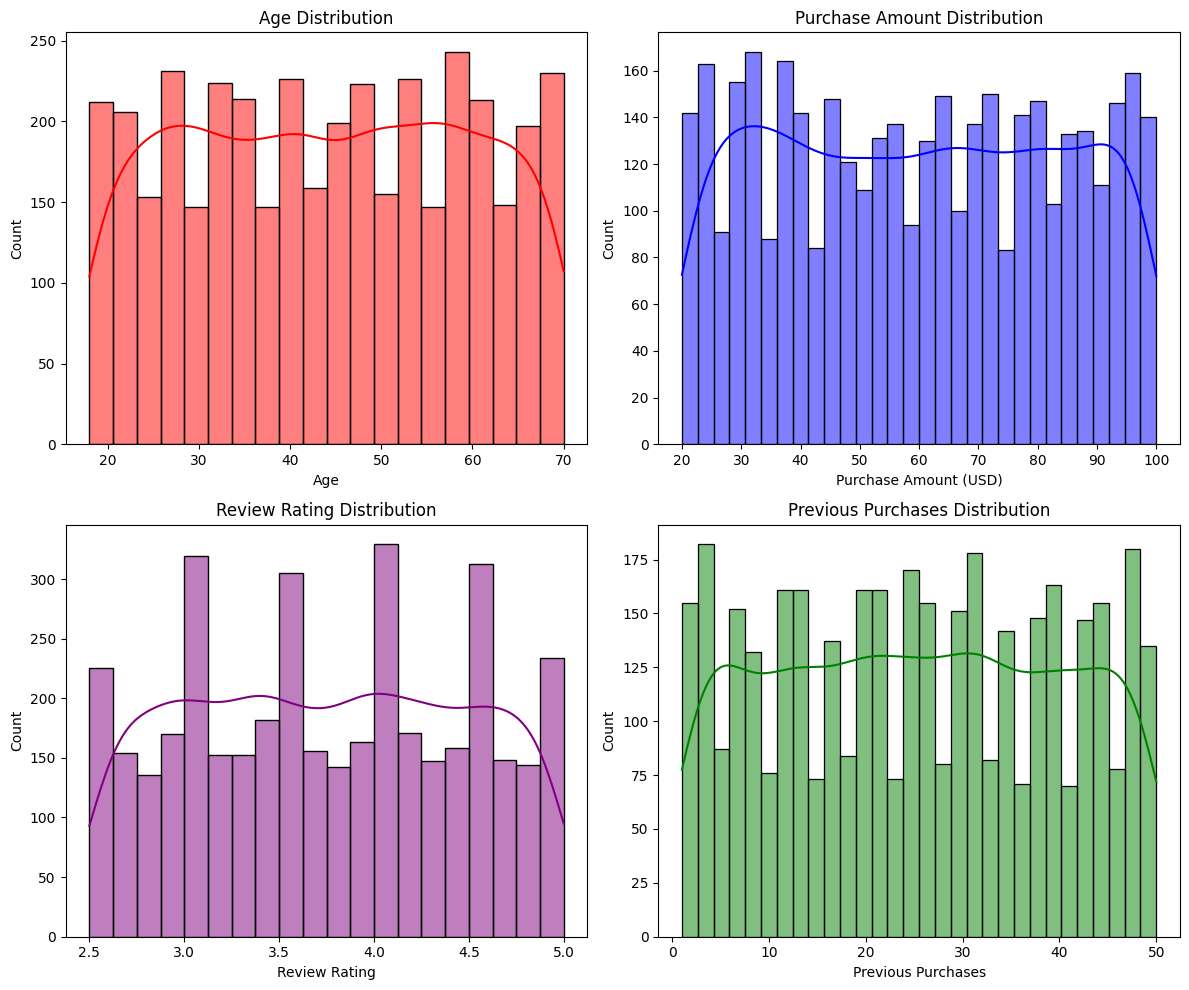

In [8]:
# Setting up a figure for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Age Distribution - Histogram & KDE
sns.histplot(df['Age'], kde=True, bins=20, ax=axes[0, 0], color='red')
axes[0, 0].set_title("Age Distribution")

# 2. Purchase Amount (USD) - Histogram & KDE
sns.histplot(df['Purchase Amount (USD)'], kde=True, bins=30, ax=axes[0, 1], color='blue')
axes[0, 1].set_title("Purchase Amount Distribution")

# 3. Review Rating - Histogram & KDE
sns.histplot(df['Review Rating'], kde=True, bins=20, ax=axes[1, 0], color='purple')
axes[1, 0].set_title("Review Rating Distribution")

# 4. Previous Purchases - Histogram & KDE
sns.histplot(df['Previous Purchases'], kde=True, bins=30, ax=axes[1, 1], color='green')
axes[1, 1].set_title("Previous Purchases Distribution")

plt.tight_layout()
plt.show()


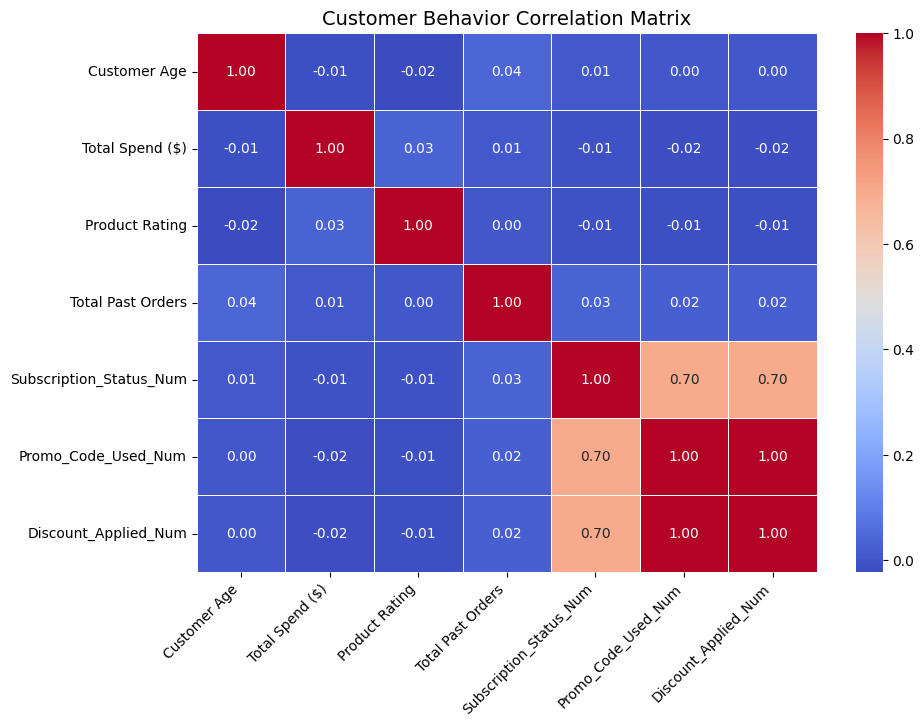

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_copy = df.copy()

# Renaming features for better readability
df_copy.rename(columns={
    'Age': 'Customer Age',
    'Purchase Amount (USD)': 'Total Spend ($)',
    'Review Rating': 'Product Rating',
    'Previous Purchases': 'Total Past Orders'
}, inplace=True)

# Selecting numerical features
numerical_features = ['Customer Age', 'Total Spend ($)', 'Product Rating', 'Total Past Orders']

# Optionally include categorical variables converted to numeric
df_copy['Subscription_Status_Num'] = df_copy['Subscription Status'].map({'Yes': 1, 'No': 0})
df_copy['Promo_Code_Used_Num'] = df_copy['Promo Code Used'].map({'Yes': 1, 'No': 0})
df_copy['Discount_Applied_Num'] = df_copy['Discount Applied'].map({'Yes': 1, 'No': 0})

# Compute correlation matrix with extra behavioral features
corr_features = numerical_features + ['Subscription_Status_Num', 'Promo_Code_Used_Num', 'Discount_Applied_Num']
corr_matrix = df_copy[corr_features].corr()

# Plot heatmap with improved styling
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})
plt.title("Customer Behavior Correlation Matrix", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()




The distributions of numerical variables appear fairly uniform with slight variations, indicating that customer behavior is evenly spread across these metrics, without dominant trends. The correlation plot shows that subscription status, promo code usage, and discount application are strongly related, while other factors like age, total spending, and past purchases have minimal correlations with each other.

Now that we developed a solid general understanding, let's explore more specifically:
- Customer Spending Patterns (Who spends the most?)
- Impact of Discounts and Subscriptions on Purchase Amounts (Do subscribers or those with discounts spend more?)
- Product Preferences by High-Value vs. Low-Value Customers


C:\Users\Basti\AppData\Local\Temp\ipykernel_24964\3773606980.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_copy['Gender'], y=df_copy['Purchase Amount (USD)'], palette="pastel")


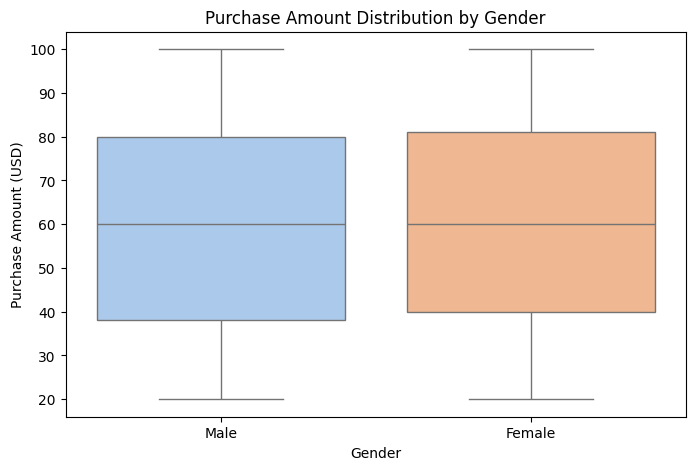

C:\Users\Basti\AppData\Local\Temp\ipykernel_24964\3773606980.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_copy['Age Group'], y=df_copy['Purchase Amount (USD)'], palette="coolwarm")


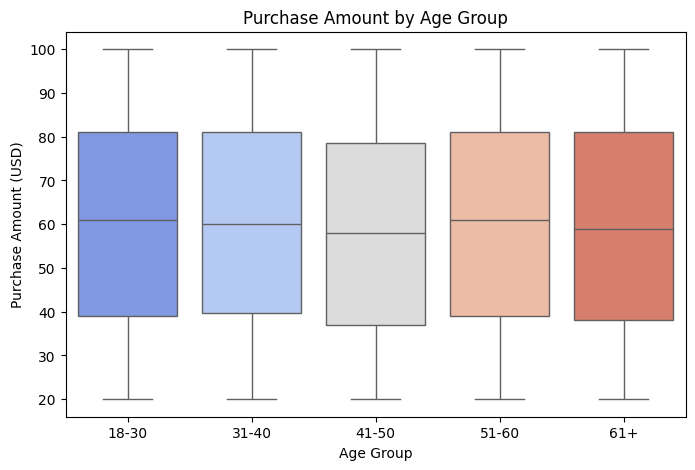

C:\Users\Basti\AppData\Local\Temp\ipykernel_24964\3773606980.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_copy['Subscription Status'], y=df_copy['Purchase Amount (USD)'], palette="Set2")


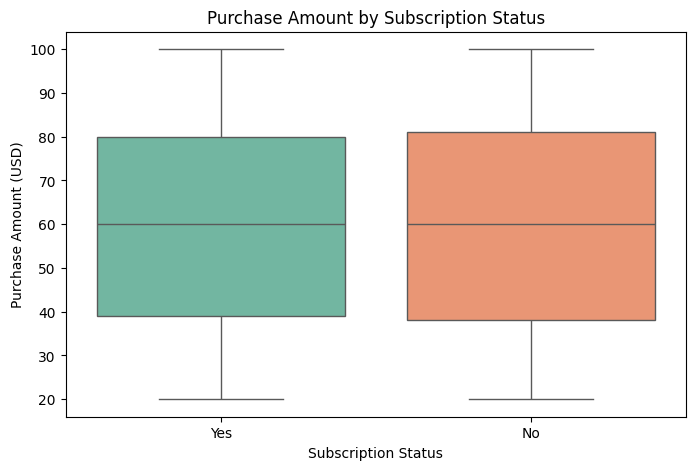

C:\Users\Basti\AppData\Local\Temp\ipykernel_24964\3773606980.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_copy['Discount Applied'], y=df_copy['Purchase Amount (USD)'], palette="muted")


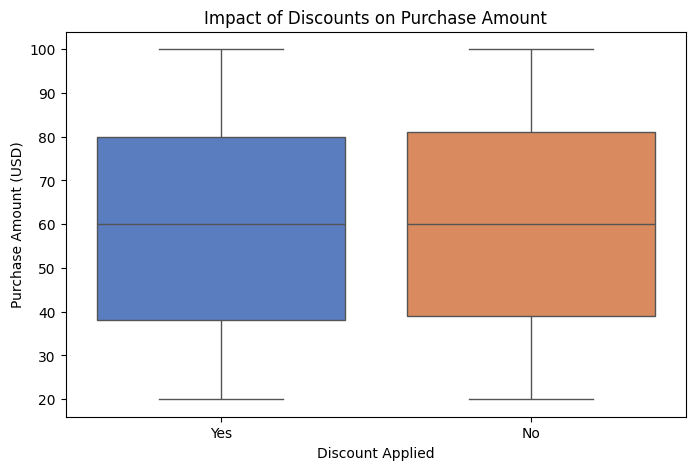

C:\Users\Basti\AppData\Local\Temp\ipykernel_24964\3773606980.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_copy['Promo Code Used'], y=df_copy['Purchase Amount (USD)'], palette="coolwarm")


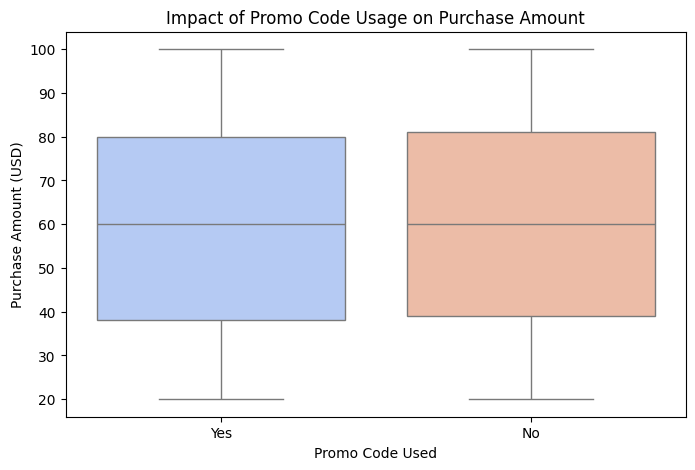

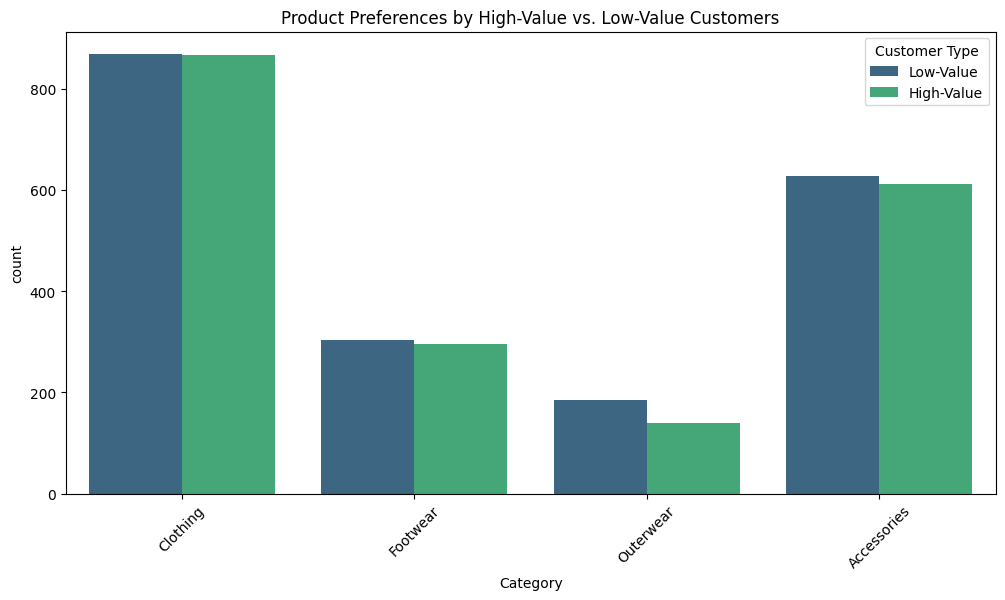

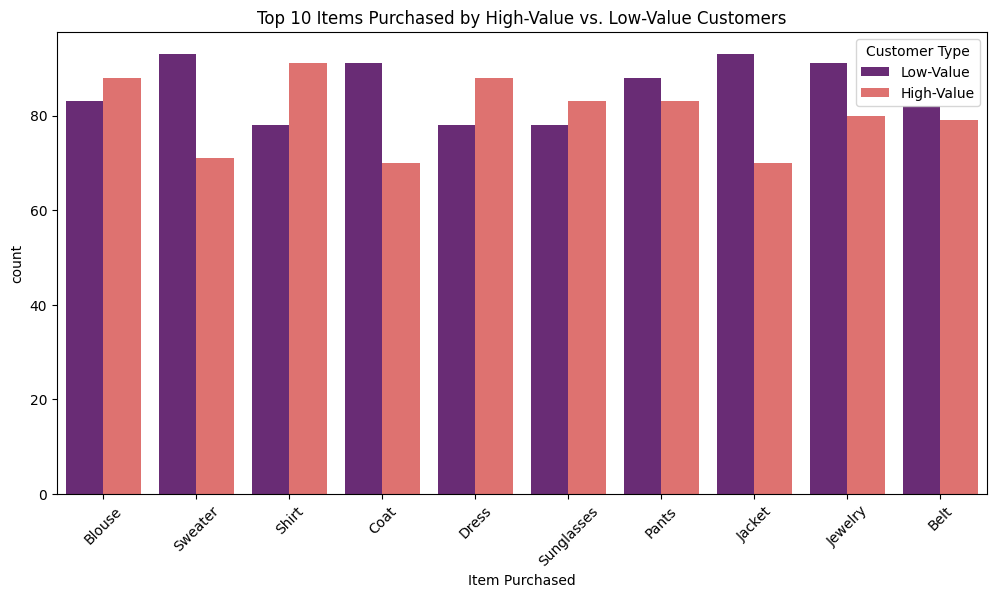

In [10]:
# Creating a copy of the original dataset to work with
df_copy = df.copy()

# Customer Spending Patterns - Who Spends the Most?

# Boxplot of Purchase Amount by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_copy['Gender'], y=df_copy['Purchase Amount (USD)'], palette="pastel")
plt.title("Purchase Amount Distribution by Gender")
plt.show()

# Boxplot of Purchase Amount by Age Groups (Binned into 5 groups)
df_copy['Age Group'] = pd.qcut(df_copy['Age'], q=5, labels=["18-30", "31-40", "41-50", "51-60", "61+"])
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_copy['Age Group'], y=df_copy['Purchase Amount (USD)'], palette="coolwarm")
plt.title("Purchase Amount by Age Group")
plt.show()

# Impact of Discounts & Subscriptions on Spending

# Boxplot of Purchase Amount by Subscription Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_copy['Subscription Status'], y=df_copy['Purchase Amount (USD)'], palette="Set2")
plt.title("Purchase Amount by Subscription Status")
plt.show()

# Boxplot of Purchase Amount by Discount Usage
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_copy['Discount Applied'], y=df_copy['Purchase Amount (USD)'], palette="muted")
plt.title("Impact of Discounts on Purchase Amount")
plt.show()

# Boxplot of Promo Code Used by Discount Purchase Amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_copy['Promo Code Used'], y=df_copy['Purchase Amount (USD)'], palette="coolwarm")
plt.title("Impact of Promo Code Usage on Purchase Amount")
plt.show()


#Product Preferences by High-Value vs. Low-Value Customers

# Define high-value and low-value customers based on median spend
median_spend = df_copy['Purchase Amount (USD)'].median()
df_copy['Customer Type'] = df_copy['Purchase Amount (USD)'].apply(lambda x: 'High-Value' if x > median_spend else 'Low-Value')

# Barplot of product categories purchased by High-Value vs Low-Value customers
plt.figure(figsize=(12, 6))
sns.countplot(x=df_copy['Category'], hue=df_copy['Customer Type'], palette="viridis")
plt.title("Product Preferences by High-Value vs. Low-Value Customers")
plt.xticks(rotation=45)
plt.show()

# Barplot of item purchases by High-Value vs Low-Value customers
top_10_items = df_copy['Item Purchased'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x=df_copy[df_copy['Item Purchased'].isin(top_10_items)]['Item Purchased'], 
              hue=df_copy['Customer Type'], palette="magma")
plt.title("Top 10 Items Purchased by High-Value vs. Low-Value Customers")
plt.xticks(rotation=45)
plt.show()


Again, distributions are mostly uniform and the dataset is balanced. We can note that there is *no outliers*. Promo code usage or Discounts do not seem to be driving spending.

#### Q1.1 - Provide three insights you extracted from the EDA analysis [Free text + code] (3 points)

Four insights from the EDA:

1. **Customer Spending is consistent across demographics**
2. **Discounts, promo codes and subscriptions do not increase Spending**
3. **Product Preferences are univeral among high-value and low-value customers**
4. **Customers who are subscribed seem to be using promo code more**

### Question 2 (6 points)
SmartRetail’s marketing team recognizes that different customer groups have distinct shopping behaviors, preferences, and spending habits. By continuing with a one-size-fits-all marketing approach, the company risks alienating high-value customers while overspending on ineffective promotions for low-value segments. **The goal is to identify actionable customer segments that will allow SmartRetail to tailor its marketing campaigns for maximum impact**.

#### Q2.1. Please provide the number of customers segments. [Free text + code] (3 points)

In [6]:
#Let's make a new column on our dataset, grouping the different Locations (States) into regions
df_copy = df.copy()
# Define state-to-region mapping
state_to_region = {
    "Maine": "Northeast", "Vermont": "Northeast", "New Hampshire": "Northeast",
    "Massachusetts": "Northeast", "Rhode Island": "Northeast", "Connecticut": "Northeast",
    "New York": "Northeast", "New Jersey": "Northeast", "Pennsylvania": "Northeast",

    "Ohio": "Midwest", "Indiana": "Midwest", "Illinois": "Midwest", "Michigan": "Midwest",
    "Wisconsin": "Midwest", "Minnesota": "Midwest", "Iowa": "Midwest", "Missouri": "Midwest",
    "North Dakota": "Midwest", "South Dakota": "Midwest", "Nebraska": "Midwest", "Kansas": "Midwest",

    "Delaware": "South", "Maryland": "South", "Virginia": "South", "West Virginia": "South",
    "Kentucky": "South", "North Carolina": "South", "South Carolina": "South", "Tennessee": "South",
    "Georgia": "South", "Florida": "South", "Alabama": "South", "Mississippi": "South",
    "Arkansas": "South", "Louisiana": "South", "Texas": "South", "Oklahoma": "South",

    "Montana": "West", "Idaho": "West", "Wyoming": "West", "Nevada": "West",
    "Utah": "West", "Colorado": "West", "Arizona": "West", "New Mexico": "West",
    "Alaska": "West", "Hawaii": "West", "Washington": "West", "Oregon": "West", "California": "West"
}

# Apply mapping to create a new "Region" column
df_copy["Region"] = df_copy["Location"].map(state_to_region)

# Fill missing values with "Other"
df_copy["Region"].fillna("Other", inplace=True)

#Let's also create a new column for age bins

# Define age group bins and labels
bins = [18, 25, 35, 45, 55, 71]  # Age intervals
labels = ["18-25", "26-35", "36-45", "46-55", "56-70"]  # Age group names

# Create Age Group column
df_copy["Age Group"] = pd.cut(df_copy["Age"], bins=bins, labels=labels, right=True, include_lowest=True)


#Let's also reduce the granularity of purchase frequency into 3 categories

# Define purchase frequency categories
frequency_mapping = {
    "Weekly": "High",
    "Bi-Weekly": "High",
    "Fortnightly": "Medium",
    "Monthly": "Medium",
    "Every 3 Months": "Low",
    "Quarterly": "Low",
    "Annually": "Very Low"
}

# Apply mapping
df_copy["Purchase Frequency Group"] = df_copy["Frequency of Purchases"].map(frequency_mapping)

df_copy["Customer Lifetime Value"] = df_copy["Purchase Amount (USD)"] * df_copy["Previous Purchases"]


print(df_copy.columns)



Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Region', 'Age Group',
       'Purchase Frequency Group', 'Customer Lifetime Value'],
      dtype='object')


C:\Users\Basti\AppData\Local\Temp\ipykernel_11632\2573613291.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Region"].fillna("Other", inplace=True)


In [9]:
#Let's preprocess the data to make a processed dataset usable for clustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Selecting relevant features
numerical_features = ['Purchase Amount (USD)', 'Customer Lifetime Value', "Previous Purchases"]
categorical_features = ["Purchase Frequency Group", "Subscription Status"] 

# Creating a transformer to scale numerical data and encode categorical data
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
])

# Transforming the dataset
X_transformed = preprocessor.fit_transform(df_copy)  # Apply the transformation correctly

# Get correct feature names for the transformed dataset
feature_names = (
    numerical_features + 
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)

# Convert transformed data into a DataFrame
df_processed = pd.DataFrame(X_transformed, columns=feature_names)

# Display the processed dataset
df_processed.shape



(3900, 9)

In [10]:
#Using PCA to keep the 3 most important PCA features
from sklearn.decomposition import PCA

# Apply PCA n = 3
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_processed)    

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


# Check how many components were selected
print("Number of PCA components:", pca.n_components_)


Explained Variance Ratio: [0.47441739 0.24042511 0.09542058]
Number of PCA components: 3


In [14]:
print(pca.components_)

[[ 0.40487882  0.70561336  0.5813042  -0.0009628   0.01000764 -0.00455989
  -0.00448495 -0.00794922  0.00794922]
 [ 0.82200132 -0.00256835 -0.56884212  0.00257754 -0.00435751 -0.00623085
   0.00801082  0.01728075 -0.01728075]
 [-0.01724398  0.01033052  0.01754247 -0.01746774  0.05316839 -0.02529244
  -0.0104082   0.70548145 -0.70548145]]


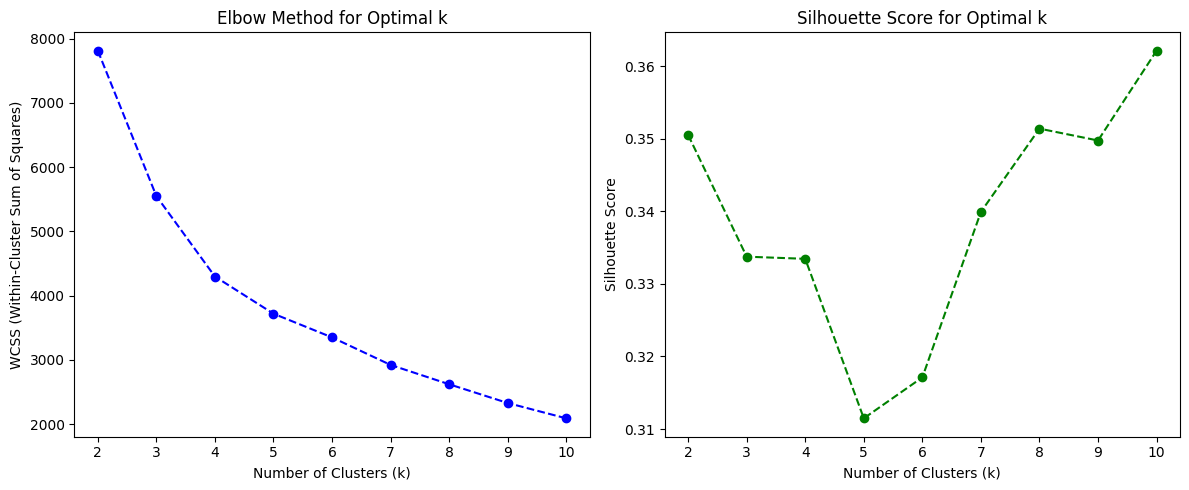

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Lists to store WCSS and Silhouette Scores
wcss = []
silhouette_scores = []

# Testing k values from 2 to 10
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)  # Fit K-Means and get cluster labels 
    
    wcss.append(kmeans.inertia_)  # Append WCSS for Elbow Method
    silhouette_scores.append(silhouette_score(df_pca, labels))  # Append Silhouette Score

# Plot Elbow Method (WCSS)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, position 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.xticks(range(2, 11))

# Plot Silhouette Scores
plt.subplot(1, 2, 2)  # Create subplot (1 row, 2 columns, position 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.xticks(range(2, 11))

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


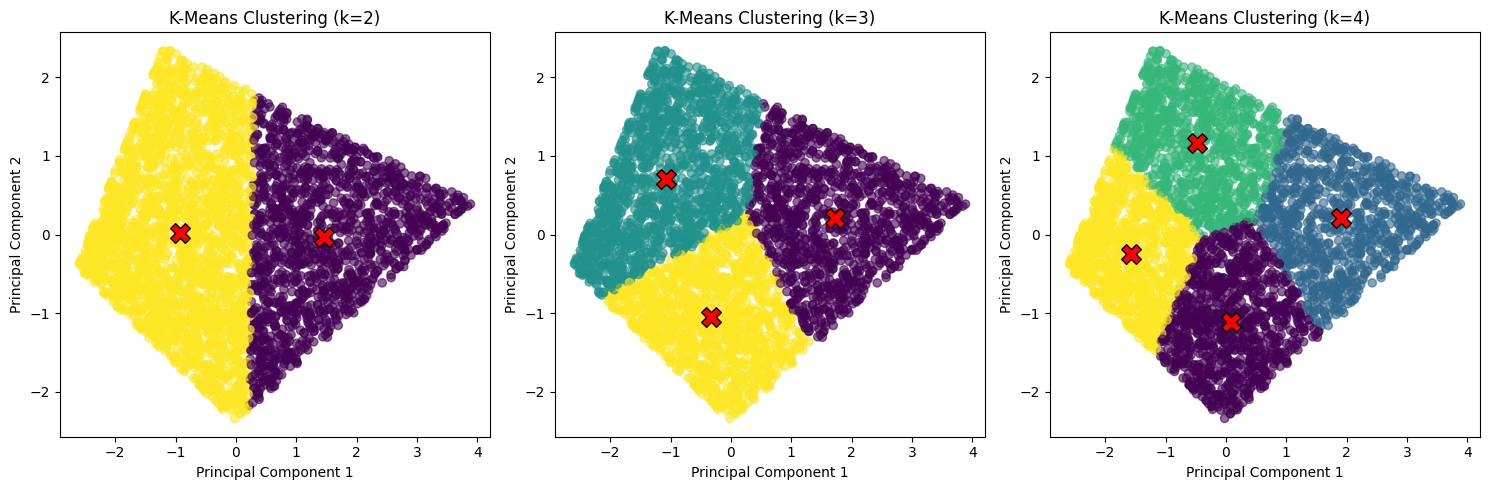

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = [2, 3, 4]  # Trying k = 3, 4, 5

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Create subplots for each k

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_pca)  # Fit on PCA data

    # Plot clusters using the first two PCA components
    axes[idx].scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
    axes[idx].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                      s=200, c='red', marker='X', edgecolors='black')  # Cluster centers
    axes[idx].set_title(f"K-Means Clustering (k={k})")
    axes[idx].set_xlabel("Principal Component 1")
    axes[idx].set_ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


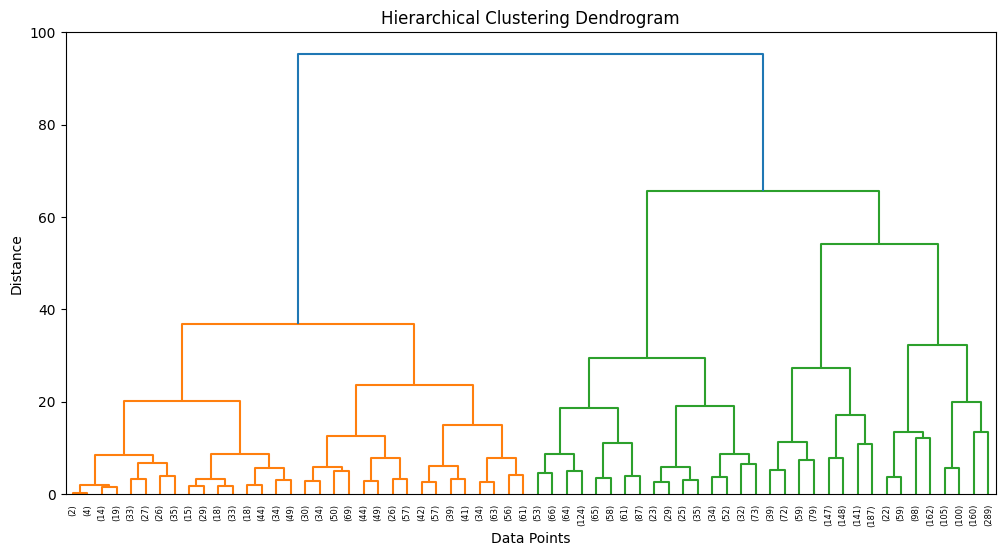

In [17]:
#Dendogramm to have more information about what could be a good segment number 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataset is numerical (Use PCA-transformed data)
df_hierarchical = df_pca 

# Perform Hierarchical Clustering
Z = linkage(df_hierarchical, method="ward")  # Ward minimizes variance within clusters

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=5)  # Limits tree depth for readability
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

 After experimenting with different features, *Purchase Amount (USD)*, *Customer Lifetime Value*, *Previous Purchases*, *Subscription Status*, *Purchase Frequency Group* were selected. This choice aligns with the marketing team's insight that different customer groups exhibit distinct shopping behaviors, preferences, and spending habits. Other features such as demographics-related or product-preference-related metrics seem to just add noise to the model. We also know from the EDA that:
 - Customer preferences are evenly distributed
 - Promo code usage / discounts seem to have no effect on spending and are highly correlated with selected feature Subscription Status
 

Based on the Elbow Method, the Within-Cluster Sum of Squares (WCSS) shows a noticeable reduction in variance until K = 3, after which the decrease becomes more gradual, indicating diminishing returns in adding more clusters. Additionally, the dendrogram shows a natural separation at this level. For this task, **the number of customer segment is 3**.

#### Q2.2. Are the customers segments well defined? How did you measure it? [Free text + code] (1.5 points)

The customer segments are moderately well-defined, as indicated by a Silhouette Score of approximately 0.33 for K = 3. While higher values of K yield better Silhouette Scores, increasing the number of clusters beyond 3 reduces interpretability, making it less practical for the marketing team. Additionally, throughout the process of experimenting with different features, I actively looked for patterns and trends within the clusters to ensure meaningful segmentation. 

From the more detailed Silhouette Plot below, we observe that while clusters are distinguishable, some overlap exists, particularly with lower silhouette coefficient values near 0.0. This suggests that certain data points may not fit well into any single cluster, which indicates an opportunity for refinement.

Even though this segmentation provides actionable insights, there is room for improvement—such as testing alternative clustering methods (e.g., DBSCAN, Hierarchical Clustering), adjusting feature selection in collaboration with the marketing team, or exploring non-linear dimensionality reduction techniques like t-SNE to enhance separation.

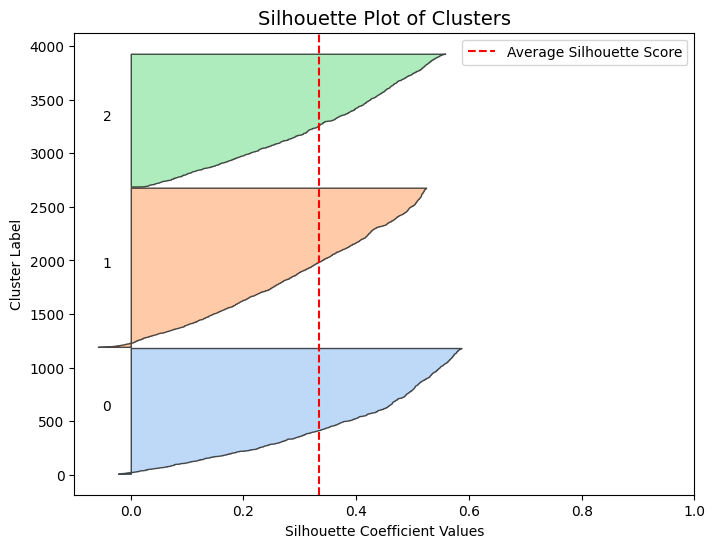

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Convert df_pca from array to DataFrame with proper column names
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2", "PC3"])

# Train K-Means using df_pca
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_pca["Cluster"] = kmeans.fit_predict(df_pca)  # Assign clusters in df_pca

# Compute silhouette scores for each sample
silhouette_vals = silhouette_samples(df_pca.drop(columns=["Cluster"]), df_pca["Cluster"])

# Compute average silhouette score
avg_silhouette = silhouette_score(df_pca.drop(columns=["Cluster"]), df_pca["Cluster"])

# Create silhouette plot
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

colors = sns.color_palette("pastel", len(np.unique(df_pca["Cluster"])))  # Use pastel colors

for i, cluster in enumerate(np.unique(df_pca["Cluster"])):
    cluster_silhouette_vals = silhouette_vals[df_pca["Cluster"] == cluster]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                     facecolor=colors[i], edgecolor='black', alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster, str(cluster), fontsize=10)
    y_lower = y_upper + 10  # Add space between clusters

# Draw average silhouette score line
ax.axvline(avg_silhouette, color="red", linestyle="--", label="Average Silhouette Score")

ax.set_title("Silhouette Plot of Clusters", fontsize=14)
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.set_xlim([-0.1, 1])
ax.legend()

# Display the plot
plt.show()



#### Q2.3. Interpret the customer segments [Free text] (1.5 points)

In [19]:
df_copy["Cluster"] = df_pca["Cluster"]

import pandas as pd

# Set Pandas display options for better formatting
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.float_format", "{:.2f}".format)  # Limit decimal places

# Group by cluster and calculate summary statistics
cluster_summary = df_copy.groupby("Cluster").agg({
    "Purchase Amount (USD)": ["mean", "median"],
    "Customer Lifetime Value": ["mean", "median"],  #Total customer worth
    "Previous Purchases": ["mean", "median"],
    "Age Group": lambda x: x.mode()[0],  # Most common age group
    "Region": lambda x: x.mode()[0],  # Most common region
    "Subscription Status": lambda x: x.mode()[0],  # Most common subscription status
    "Discount Applied": lambda x: x.mode()[0],  # Most common discount usage
    "Purchase Frequency Group": lambda x: x.mode()[0],  #Buying frequency - engagement metric
    "Gender": lambda x: x.mode()[0], #Gender
    "Category": lambda x: x.mode()[0], #Preffered Category
    "Size": lambda x: x.mode()[0], #Preffered Size
    "Review Rating" : ["mean"]
}).reset_index()

# Display the formatted DataFrame
print(cluster_summary)


  Cluster Purchase Amount (USD)        Customer Lifetime Value          \
                           mean median                    mean  median   
0       0                 79.59  81.00                 2936.57 2790.00   
1       1                 63.07  64.00                  672.65  560.00   
2       2                 37.03  36.00                 1187.61 1184.00   

  Previous Purchases        Age Group   Region Subscription Status  \
                mean median  <lambda> <lambda>            <lambda>   
0              37.31  38.00     56-70    South                  No   
1              10.37  10.00     56-70    South                  No   
2              31.99  31.00     56-70    South                  No   

  Discount Applied Purchase Frequency Group   Gender  Category     Size  \
          <lambda>                 <lambda> <lambda>  <lambda> <lambda>   
0               No                      Low     Male  Clothing        M   
1               No                     High     Male 

This segmentation categorizes customers based on **Purchase Frequency Group, Purchase Amount, and Customer Lifetime Value (CLV)** to identify key purchasing behaviors.  

### Cluster 1: High-Value, Low-Frequency Buyers  
- **Purchase Amount:** High (Mean: $79.59, Median: $81.00)  
- **Customer Lifetime Value:** High (Mean: $2936.57, Median: $2790.00)  
- **Purchase Frequency Group:** Low  

Customers in this segment make *infrequent purchases but spend significantly more per transaction*.

### Cluster 2: Mid-Value, High-Frequency Buyers  
- **Purchase Amount:** Moderate (Mean: $63.07 (close to the overall mean), Median: $64.00)  
- **Customer Lifetime Value:** Low (Mean: $672.65, Median: $560.00)  
- **Purchase Frequency Group:** High  

These customers purchase *frequently but with lower spending per transaction*.
### Cluster 3: Low-Value, Medium-Frequency Buyers  
- **Purchase Amount:** Low (Mean: $37.03, Median: $36.00)  
- **Customer Lifetime Value:** Moderate (Mean: $1187.61, Median: $1184.00)  
- **Purchase Frequency Group:** Medium  
 
These customers fall between occasional and frequent shoppers but spend less per purchase. Their moderate CLV suggests some retention potential if engagement is improved.  

Certain categorical variables (**Gender, Category, Region, Discounts, Age**) are identical across all clusters. 


### Question 3 (5 points)
Customer retention remains a key challenge for SmartRetail. SmartRetail is concerned about customer retention. Instead of predicting churn, the company wants to be able to identify loyal customers who consistently shop and engage with the platform thought subscription. This will help enhance loyalty programs and retention strategies.

In [20]:
df_copy["Subscription Status"].value_counts() #the target value is clearly unbalanced

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

In [21]:
df_copy["Subscription Status"].value_counts(normalize=True) #the target value is clearly unbalanced

Subscription Status
No    0.73
Yes   0.27
Name: proportion, dtype: float64

#### Q3.1. Develop two models to answer the company need. Why did you choose those models? [Free text + code] (3 points)

Since this is a binary classification problem, the goal is to predict whether a customer is loyal (subscribed).

I will first train a *Logistic Regression* model, as it is simple, interpretable, and serves as a strong baseline. Additionally, it allows for feature importance analysis, which will help the company understand key drivers of loyalty and compute a subscription probability score for every customer. This will provide actionable insights for SmartRetail’s marketing team.

Next, I will train a *Random Forest* model because it captures non-linear relationships that logistic regression might miss. It is also more robust to outliers and noise. Additionally, it provides feature importance rankings, which help identify key factors influencing customer loyalty. Since Random Forest handles feature interactions well, it can reveal hidden patterns in customer behavior that traditional models might overlook.

I will also train an *XGBoost* model, which is a powerful gradient boosting algorithm known for its high predictive performance and ability to handle imbalanced datasets effectively. XGBoost uses boosting to sequentially improve weak models, often leading to better generalization and lower bias. Additionally, it provides gain-based feature importance, which helps refine our understanding of what drives customer loyalty.

But first, I will include most of the available features, train these models, and perform feature importance analysis. Based on the insights gained, I will then select the most relevant features and retrain the models using only these, ensuring improved efficiency, interpretability, and generalization.

In [14]:
#Preprocessing of the data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.utils import shuffle

#Let's make a new column on our dataset, grouping the different Locations (States) into regions
df_copy = df.copy()


# Define state-to-region mapping
state_to_region = {
    "Maine": "Northeast", "Vermont": "Northeast", "New Hampshire": "Northeast",
    "Massachusetts": "Northeast", "Rhode Island": "Northeast", "Connecticut": "Northeast",
    "New York": "Northeast", "New Jersey": "Northeast", "Pennsylvania": "Northeast",

    "Ohio": "Midwest", "Indiana": "Midwest", "Illinois": "Midwest", "Michigan": "Midwest",
    "Wisconsin": "Midwest", "Minnesota": "Midwest", "Iowa": "Midwest", "Missouri": "Midwest",
    "North Dakota": "Midwest", "South Dakota": "Midwest", "Nebraska": "Midwest", "Kansas": "Midwest",

    "Delaware": "South", "Maryland": "South", "Virginia": "South", "West Virginia": "South",
    "Kentucky": "South", "North Carolina": "South", "South Carolina": "South", "Tennessee": "South",
    "Georgia": "South", "Florida": "South", "Alabama": "South", "Mississippi": "South",
    "Arkansas": "South", "Louisiana": "South", "Texas": "South", "Oklahoma": "South",

    "Montana": "West", "Idaho": "West", "Wyoming": "West", "Nevada": "West",
    "Utah": "West", "Colorado": "West", "Arizona": "West", "New Mexico": "West",
    "Alaska": "West", "Hawaii": "West", "Washington": "West", "Oregon": "West", "California": "West"
}

# Apply mapping to create a new "Region" column
df_copy["Region"] = df_copy["Location"].map(state_to_region)

# Fill missing values with "Other"
df_copy["Region"].fillna("Other", inplace=True)

#Let's also create a new column for age bins

# Define age group bins and labels
bins = [18, 25, 35, 45, 55, 71]  # Age intervals
labels = ["18-25", "26-35", "36-45", "46-55", "56-70"]  # Age group names

# Create Age Group column
df_copy["Age Group"] = pd.cut(df_copy["Age"], bins=bins, labels=labels, right=True, include_lowest=True)

#Let's also reduce the granularity of purchase frequency into 3 categories

# Define purchase frequency categories
frequency_mapping = {
    "Weekly": "High",
    "Bi-Weekly": "High",
    "Fortnightly": "Medium",
    "Monthly": "Medium",
    "Every 3 Months": "Low",
    "Quarterly": "Low",
    "Annually": "Very Low"
}


df_copy = shuffle(df_copy, random_state=42) #shuffling the dataset so that models are less likely to overfit

# Apply mapping
df_copy["Purchase Frequency Group"] = df_copy["Frequency of Purchases"].map(frequency_mapping)

df_copy["Customer Lifetime Value"] = df_copy["Purchase Amount (USD)"] * df_copy["Previous Purchases"]

numerical_features = ['Purchase Amount (USD)', 'Customer Lifetime Value', "Previous Purchases", 'Review Rating']
categorical_features = ["Gender", "Discount Applied", "Age Group", "Category", "Region"] 

# Creating a transformer to scale numerical data and encode categorical data
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop = "first"), categorical_features)
])

# Transforming the dataset
X_transformed = preprocessor.fit_transform(df_copy)  # Apply the transformation correctly

# Get correct feature names for the transformed dataset
feature_names = (
    numerical_features + 
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)

# Convert transformed data into a DataFrame
df_processed = pd.DataFrame(X_transformed, columns=feature_names)

# Display the processed dataset
print(df_processed.shape)

# Define target variable
target = df_copy["Subscription Status"].map({"Yes": 1, "No": 0})  # Convert to binary

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_processed, target, test_size=0.2, random_state=42, stratify=target)

(3900, 16)


C:\Users\Basti\AppData\Local\Temp\ipykernel_11632\1061073721.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["Region"].fillna("Other", inplace=True)


Best C Value: 0.01
Tuned Logistic Regression Performance:
Accuracy: 0.8359
Precision: 0.6224
Recall: 1.0000
F1 Score: 0.7673
F1 Score - Weighted: 0.8446 (Optimized Metric)
AUC-ROC: 0.8875


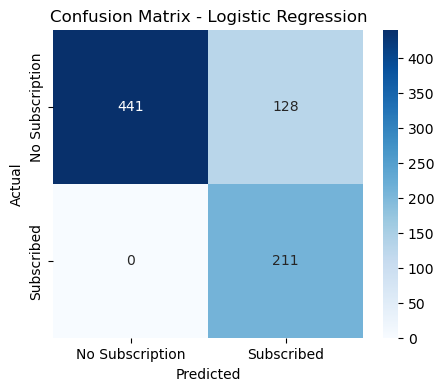

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

# Define logistic regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42, class_weight="balanced", penalty='l1')

# Define hyperparameter grid (regularization strength `C`)
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]  # Regularization strength
}

# Use GridSearchCV to optimize recall
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=cv, scoring="f1_weighted", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model based on weighted f1
best_log_reg = grid_search.best_estimator_

# Make predictions
y_pred = best_log_reg.predict(X_test)

print(f"Best C Value: {grid_search.best_params_['C']}")

# Evaluate model performance
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"F1 Score - Weighted: {f1_score(y_test, y_pred, average='weighted'):.4f} (Optimized Metric)")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.4f}")

# Print evaluation metrics
evaluate_model(y_test, y_pred, "Tuned Logistic Regression")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Subscription", "Subscribed"], yticklabels=["No Subscription", "Subscribed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best F1 Score: 0.7731552122154635
Tuned Random Forest Performance:
Accuracy: 0.8346
Precision: 0.6228
Recall: 0.9858
F1 Score: 0.7633
F1 Score - Weighted: 0.8433 (Optimized Metric)
AUC-ROC: 0.8822


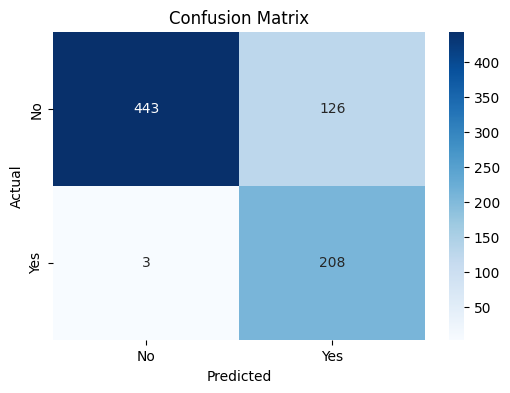

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees
    "max_depth": [5, 10, 20, None],  # Maximum tree depth
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf
    "max_features": ["sqrt", "log2"],  # Number of features per split
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42),
    param_grid,
    scoring="f1",  # Optimize for F1-score (good for imbalanced data)
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2  # Show progress
)

# Run GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Train best model on full training data
best_rf = grid_search.best_estimator_

# Make predictions on test set
y_pred = best_rf.predict(X_test)

y_prob = best_rf.predict_proba(X_test)[:, 1]  # Get probability for class 1
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
# Print evaluation metrics
evaluate_model(y_test, y_pred, "Tuned Random Forest")
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\Basti\anaconda3\envs\ML\lib\site-packages\xgboost\core.py:158: UserWarning: [09:53:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuned xgboost Performance:
Accuracy: 0.8333
Precision: 0.6239
Recall: 0.9668
F1 Score: 0.7584
F1 Score - Weighted: 0.8418 (Optimized Metric)
AUC-ROC: 0.8753
Best Hyperparameters: {'subsample': 0.7, 'scale_pos_weight': np.float64(2.705463182897862), 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


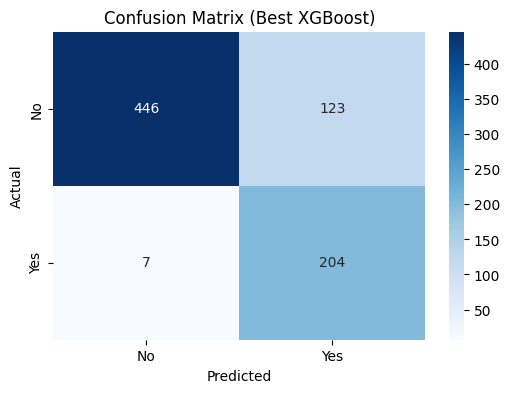

In [25]:
import xgboost as xgb  
from sklearn.model_selection import RandomizedSearchCV 

# Define parameter grid
param_grid = {
    "n_estimators": [100, 300, 500],  
    "max_depth": [3, 6, 10],  
    "learning_rate": [0.01, 0.1, 0.3],  
    "subsample": [0.5, 0.7, 1.0],  
    "colsample_bytree": [0.5, 0.7, 1.0],  
    "scale_pos_weight": [y_train.value_counts()[0] / y_train.value_counts()[1]]  # Keep balance for class imbalance
}

# Set up RandomizedSearchCV
xgb_tuned = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
random_search = RandomizedSearchCV(
    xgb_tuned,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to test
    scoring="f1_weighted",
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Run hyperparameter search
random_search.fit(X_train, y_train)

# Get best model
best_xgb = random_search.best_estimator_

# Make predictions
y_pred_best_xgb = best_xgb.predict(X_test)
y_prob_best_xgb = best_xgb.predict_proba(X_test)[:, 1]


# Print evaluation metrics
evaluate_model(y_test, y_pred_best_xgb, "Tuned xgboost")

# Print best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Best XGBoost)")
plt.show()


In [20]:
#Feature importance analysis
import numpy as np
import pandas as pd
import shap

# Get feature coefficients from Logistic Regression
coefs = best_log_reg.coef_[0]  # Extract coefficients
feature_importance_lr = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefs)})
feature_importance_lr = feature_importance_lr.sort_values(by='Importance', ascending=False)

# Get feature importance from Random Forest
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_rf.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Get feature importance from XGBoost
feature_importance_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_xgb.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)


# SHAP Feature Importance for XGBoost (Most Reliable)
explainer = shap.Explainer(best_xgb, X_train)
shap_values = explainer(X_train)

# Convert to Pandas DataFrame
shap_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(shap_values.values).mean(axis=0)})
shap_importance = shap_importance.sort_values(by='Importance', ascending=False)

def plot_feature_importance(feature_importance, model_name):
    # Select top 10 features
    top_features = feature_importance[:10]

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(y=top_features["Feature"], x=top_features["Importance"], palette="viridis")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.title(f"Top 10 Feature Importance - {model_name}")
    plt.gca().invert_yaxis()  # Flip to show the most important first
    plt.show()

# Plot for Logistic Regression
plot_feature_importance(feature_importance_lr, "Logistic Regression")

# Plot for Random Forest
plot_feature_importance(feature_importance_rf, "Random Forest")

# Plot for XGBoost
plot_feature_importance(feature_importance_xgb, "XGBoost")

plot_feature_importance(shap_importance, "SHAP (XGBoost)")



NameError: name 'best_rf' is not defined

This feature importance anlaysis shows surprising patterns: 
 - When Customer ID is inculded, the models perfrom extremely well among all evaluation metrics and Customer ID becomes a really strong predictor (strong negative correlation with Subscription Status and therefore as well with Promo Code Used and Discount Applied).
 - When Promo Code Used or Discount Applied are included, the model performs really well, and the included feature becomes a really strong predictor but remains less important than Customer ID
 - When Promo Code Used or Discount Applied are included but Customer ID is not, the models are performing well overall  (espeically well on recall but low on precision). Discount Applied becomes the most important feature for all model, followed by Gender for Xgboost and Random Forest. 
 - When these are not included, the models do not perform so well and Gender seems to become the feature with the highest prediction power (this is artificial though, if one looks at the dataset one sees gender =  Male until a certain point and after this point gender = Female (cutoff point))
 - When Gender is not included neither, then the models perform badly (worse than random (ROC-AUC < 0.5)) and features importance depend on the model. 

So this artificial dataset does not make our lives easy. In a real-case scenario, User ID would never be used as it is simply an internal metric for relational databases (Unique Idenitifiers) but here it seems that the dataset was built and designed with Customer ID being artificially important. It is hard to find real patterns when they do not exist in the data.

In a real-world scenario, including customer ID in such a model would make no sense as this feature would be totally uncoralleted with all of the other ones, and would have no predictive power on loyalty at all. Using Discount Applied might be useful but the models should be tested on a validation set to see whether overfitting applies. Moreover, if Discount Applied is used, then it becomes the most important predictive feature for all of the models so the models might become dependent on this feature.

#### Q3.2. Which model would you choose to be deployed? Which metric did you consider in the decision? Why? [Free text] (2 points)

Assuming a real-world dataset, including Customer ID would make no sense. Let's make this assumption and not include it. Also, it would be nice to test the models trained with Promo Code Used or Discount Applied on new (real world) data to seeif they perform as well as on this data, which I strongly doubt. Nevertheless, for the sake of this assignment and performant models, let's include eitheir Discount Appplied or Promo Code Used 

**Model Performance Overview**
We evaluated three models for customer subscription prediction:  
1. **Logistic Regression** – A simple, interpretable baseline model.  
2. **Random Forest** – A more complex model that captures non-linear relationships.  
3. **XGBoost** – A powerful gradient boosting model optimized for imbalanced data.  

Below is a comparison of their key performance metrics:

| Model                | Accuracy | Precision | Recall  | F1-Score | F1-Score (Weighted) | AUC-ROC |
|----------------------|----------|-----------|--------|----------|---------------------|---------|
| Logistic Regression | 0.8359   | 0.6224    | 1.0000 | 0.7673   | 0.8446              | 0.8875  |
| Random Forest       | 0.8346   | 0.6228    | 0.9858 | 0.7683   | 0.8433              | 0.8822  |
| XGBoost            | 0.8308   | 0.6179    | 0.9810 | 0.7582   | 0.8396              | 0.8780  |


**Logistic Regression performed the best overall** -> Highest scores among most of the evaluation metric. Nevertheless, **all three models show similar performance overall**


The following metrics were mainly considered:

**AUC-ROC**
   - Measures the model’s ability to distinguish between subscribed and non-subscribed customers..

**F1-Score**
   - Balances precision and recall, ensuring the model is effective in identifying actual subscribers.

**F1-Score (Weighted)**  
   - Accounts for class imbalance by averaging F1-scores proportionally to class distribution.

**Recall**
   - Important for identifying actual subscribers..

**Precision**
   - Helps reduce false positives, ensuring the model does not wrongly classify non-subscribers as subscribers.



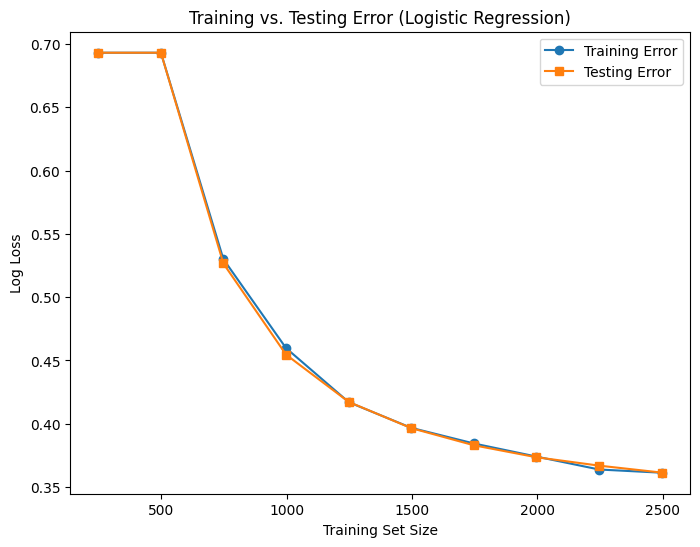

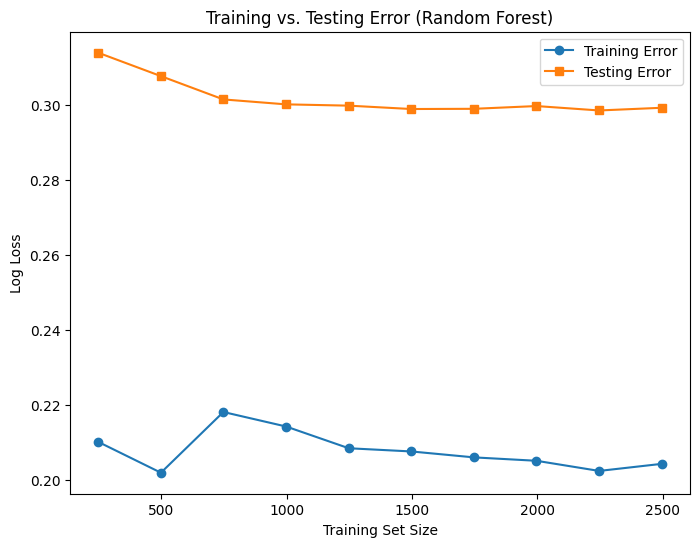

c:\Users\Basti\anaconda3\envs\ML\lib\site-packages\xgboost\core.py:158: UserWarning: [09:54:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Basti\anaconda3\envs\ML\lib\site-packages\xgboost\core.py:158: UserWarning: [09:54:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Basti\anaconda3\envs\ML\lib\site-packages\xgboost\core.py:158: UserWarning: [09:54:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Basti\anac

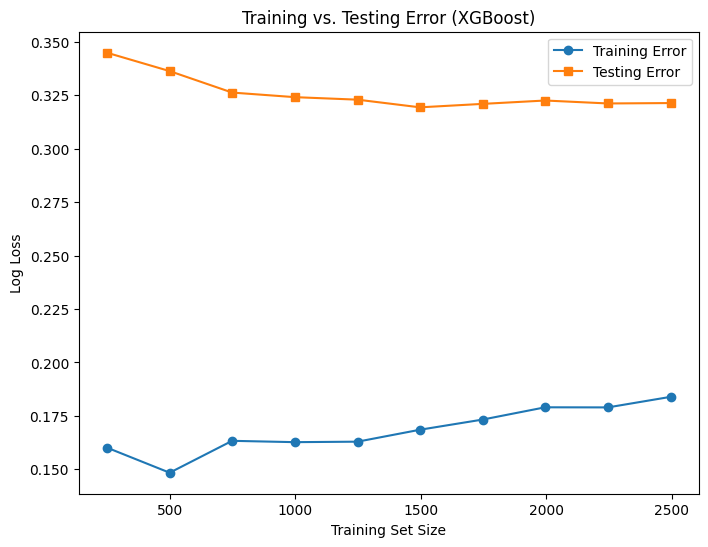

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.model_selection import learning_curve

# Function to plot training vs testing error
def plot_learning_curve(model, X_train, y_train, X_test, y_test, model_name):
    train_sizes = np.linspace(0.1, 1.0, 10)  # Varying training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, train_sizes=train_sizes, cv=5, scoring="neg_log_loss"
    )

    # Convert negative log loss to positive for visualization
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    # Plot learning curves
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Error", marker="o")
    plt.plot(train_sizes, test_scores_mean, label="Testing Error", marker="s")
    plt.xlabel("Training Set Size")
    plt.ylabel("Log Loss")
    plt.title(f"Training vs. Testing Error ({model_name})")
    plt.legend()
    plt.show()

# Apply to all models
plot_learning_curve(best_log_reg, X_train, y_train, X_test, y_test, "Logistic Regression")
plot_learning_curve(best_rf, X_train, y_train, X_test, y_test, "Random Forest")
plot_learning_curve(best_xgb, X_train, y_train, X_test, y_test, "XGBoost")


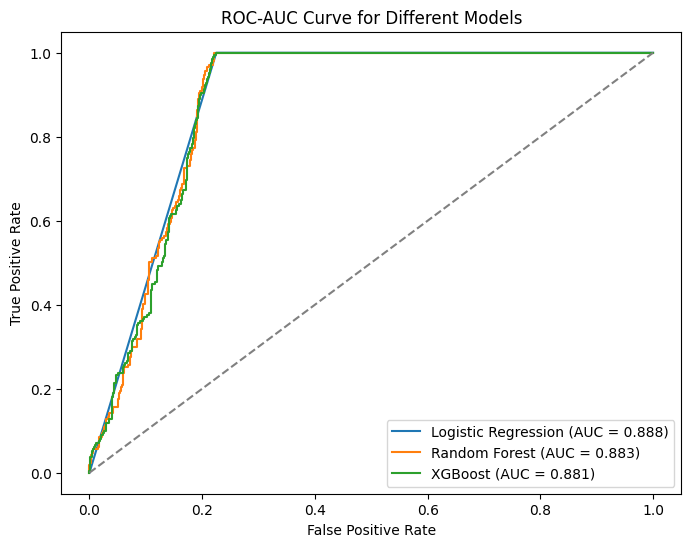

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC Curve and AUC for each model
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for name, model in models.items():
        y_probs = model.predict_proba(X_test)[:, 1]  # Get probability scores for positive class
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

    # Plot formatting
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reference line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-AUC Curve for Different Models")
    plt.legend(loc="lower right")
    plt.show()

# Dictionary of models
models = {
    "Logistic Regression": best_log_reg,
    "Random Forest": best_rf,
    "XGBoost": best_xgb
}

# Plot ROC-AUC curve
plot_roc_curve(models, X_test, y_test)


Overall, performance of these models is similar across analysed evulation metrics. Nevertheless, the Training vs Testing errors of the XGBoost model shows that it is most likely not overfitting so much because the testing and training errors seem to converge but might be impacted by some noisy features. 

To conclude, I would chose **XGBoost** model as I think it has the most potential after some more feature engeneering and maybe larger dataset. 

### Question 4 (6 points)
SmartRetail is looking to enhance its customer engagement and increase sales by moving away from static product suggestions toward a more dynamic and personalized approach. Given the available data, the company wants to explore how customer shopping behavior, purchase frequency, and spending patterns can be leveraged to make more relevant recommendations.

#### Q4.1 With this in mind, how can SmartRetail develop a recommendation system that better aligns with customer purchasing behavior and preferences? What approach would you take to ensure recommendations are relevant and personalized? Justify your choice and demonstrate your implementation. [Free text + code] (4 points)

Since the company is aiming to develop a recommendation system based on customer purchasing behavior and preferences, it naturally aligns with a Collaborative Filtering approach. However, from the EDA and previous models, we know that the dataset is balanced, and there are no strong patterns in purchasing behavior and preferences. Despite this, Collaborative Filtering remains the best option, as there are limited content-based features available to support a Content-Based Filtering approach.

To ensure that recommendations are relevant and personalized, we will implement an **Item-Based Collaborative Filtering Recommendation System**. User-Based Collaborative Filtering requires significant user overlap in purchasing habits to establish meaningful similarities. The SmartRetail dataset has diverse and unrealated purchasing behaviors, meaning there is limited transaction overlap between customers. This creates data sparsity issues, making it harder to generate accurate recommendations. In contrast, Item-Based Collaborative Filtering is more stable because it relies on item relationships rather than user similarities, making it more scalable for retail environments.

Since SmartRetail needs personalized recommendations, I implemented both Item-Based and User-Based Collaborative Filtering. Due to data sparsity, item-based CF is expected to perform better, but I will compare both approaches to determine the best fit for SmartRetail’s data.

In [104]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Step 1: Create a User-Item Purchase Matrix
user_item_matrix = df.pivot_table(
    index="Customer ID",
    columns="Item Purchased",
    values="Review Rating",
    fill_value=0
)

# Convert the matrix to a sparse format for efficiency
sparse_matrix = csr_matrix(user_item_matrix)

# Step 2: Compute Item-Item Similarity using Cosine Similarity
item_similarity = cosine_similarity(sparse_matrix.T)  # Transpose to compare items

# Convert similarity matrix to a DataFrame for easy lookup
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

item_similarity_df

Item Purchased  Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  Handbag  \
Item Purchased                                                                
Backpack            1.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Belt                0.00  1.00    0.00   0.00  0.00   0.00    0.00     0.00   
Blouse              0.00  0.00    1.00   0.00  0.00   0.00    0.00     0.00   
Boots               0.00  0.00    0.00   1.00  0.00   0.00    0.00     0.00   
Coat                0.00  0.00    0.00   0.00  1.00   0.00    0.00     0.00   
Dress               0.00  0.00    0.00   0.00  0.00   1.00    0.00     0.00   
Gloves              0.00  0.00    0.00   0.00  0.00   0.00    1.00     0.00   
Handbag             0.00  0.00    0.00   0.00  0.00   0.00    0.00     1.00   
Hat                 0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Hoodie              0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Jacket              0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Jeans               0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Jewelry             0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Pants               0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Sandals             0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Scarf               0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Shirt               0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Shoes               0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Shorts              0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Skirt               0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Sneakers            0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Socks               0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Sunglasses          0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
Sweater             0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   
T-shirt             0.00  0.00    0.00   0.00  0.00   0.00    0.00     0.00   

Item Purchased  Hat  Hoodie  Jacket  Jeans  Jewelry  Pants  Sandals  Scarf  \
Item Purchased                                                               
Backpack       0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Belt           0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Blouse         0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Boots          0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Coat           0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Dress          0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Gloves         0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Handbag        0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Hat            1.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Hoodie         0.00    1.00    0.00   0.00     0.00   0.00     0.00   0.00   
Jacket         0.00    0.00    1.00   0.00     0.00   0.00     0.00   0.00   
Jeans          0.00    0.00    0.00   1.00     0.00   0.00     0.00   0.00   
Jewelry        0.00    0.00    0.00   0.00     1.00   0.00     0.00   0.00   
Pants          0.00    0.00    0.00   0.00     0.00   1.00     0.00   0.00   
Sandals        0.00    0.00    0.00   0.00     0.00   0.00     1.00   0.00   
Scarf          0.00    0.00    0.00   0.00     0.00   0.00     0.00   1.00   
Shirt          0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Shoes          0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Shorts         0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Skirt          0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Sneakers       0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.00   
Socks          0.00    0.00    0.00   0.00     0.00   0.00     0.00   0.

The items show no similarity at all. Let's try to see the User similarity

In [105]:
# Step 1: Compute User-User Similarity

# Compute cosine similarity between users based on the User-Item Purchase Matrix
user_similarity = cosine_similarity(sparse_matrix)

# Convert similarity matrix to a DataFrame for easy lookup
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

user_similarity_df


Customer ID  1     2     3     4     5     6     7     8     9     10    11    \
Customer ID                                                                     
1            1.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00   
2            0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3            0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
4            0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
5            1.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3896         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3897         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3898         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3899         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00   
3900         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00   

Customer ID  12    13    14    15    16    17    18    19    20    21    22    \
Customer ID                                                                     
1            0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2            0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00   
3            0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
4            0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
5            0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3896         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3897         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3898         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3899         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3900         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

Customer ID  23    24    25    26    27    28    29    30    31    32    33    \
Customer ID                                                                     
1            0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2            0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3            0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
4            0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
5            0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3896         0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3897         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3898         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3899         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3900         0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00   

Customer ID  34    35    36    37    38    39    40    41    42    43    44    \
Customer ID                                                                     
1            0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
2            0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3            0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00   
4            0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
5            0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
3896         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3897         0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
3898         0.00  0.00  0.0

Also no similarity between users....Let's try to build an item-based CF and a user-based CF for the sake of this assignment 

In [106]:
#IBCF
def get_item_based_recommendations_IBCF(item_name, top_n=5):
    """
    Recommends similar items based on item-item collaborative filtering.
    Uses cosine similarity between items to recommend top-N similar products.
    """
    if item_name not in item_similarity_df.index:
        return "Item not found in database."

    # Get top N most similar items (excluding the item itself)
    recommended_items = item_similarity_df[item_name].sort_values(ascending=False)[1:top_n+1] 
    
    return recommended_items

# Example: Get recommendations for "Backpack"
get_item_based_recommendations_IBCF("Backpack", top_n=5)


Item Purchased
Belt     0.00
Blouse   0.00
Boots    0.00
Coat     0.00
Dress    0.00
Name: Backpack, dtype: float64

In [107]:
#UBCF
def get_user_based_recommendations_UBCF(user_id, top_n=5):
    """
    Generates user-based recommendations using cosine similarity.
    Recommends items that similar users have purchased but the target user has not.
    """
    if user_id not in user_similarity_df.index:
        return "User not found in database."

    # Step 1: Find the most similar users (excluding itself)
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:6]  # Top 5 similar users

    # Step 2: Get items purchased by similar users
    similar_users_purchases = user_item_matrix.loc[similar_users.index]

    # Step 3: Sum purchase frequencies across similar users
    recommended_items = similar_users_purchases.sum().sort_values(ascending=False)

    # Step 4: Remove items the target user has already purchased
    user_purchased_items = user_item_matrix.loc[user_id]
    user_purchased_items = user_purchased_items[user_purchased_items > 0].index  # Items user has bought
    recommended_items = recommended_items.drop(user_purchased_items, errors='ignore')

    # Step 5: Return Top-N recommended items
    return recommended_items.head(top_n)

# Example: Get recommendations for User 1001
get_user_based_recommendations_UBCF(1001, top_n=5)


Item Purchased
Belt     0.00
Blouse   0.00
Boots    0.00
Coat     0.00
Dress    0.00
dtype: float64

Since direct item/user similarity didn't work, let's try to develop a content-based filtering approach

In [237]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df_copy = df.copy()

# Select relevant features
df_features = df_copy[['Item Purchased', 'Color']].copy()

# Create a 'combined_features' column for TF-IDF
df_features['combined_features'] = df_features.apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Perform TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df_features['combined_features'])

# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create Similarity DataFrame (indexed by 'combined_features')
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_features["combined_features"], columns=df_features["combined_features"])

#  Fix Duplicates in Index and Columns
# Group duplicate rows/columns by taking the mean
cosine_sim_df = cosine_sim_df.groupby(cosine_sim_df.index).mean()
cosine_sim_df = cosine_sim_df.groupby(cosine_sim_df.columns, axis=1).mean()


C:\Users\Basti\AppData\Local\Temp\ipykernel_24964\1837187663.py:26: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  cosine_sim_df = cosine_sim_df.groupby(cosine_sim_df.columns, axis=1).mean()


In [238]:
cosine_sim_df

combined_features  Backpack Beige  Backpack Black  Backpack Blue  \
combined_features                                                  
Backpack Beige               1.00            0.51           0.51   
Backpack Black               0.51            1.00           0.51   
Backpack Blue                0.51            0.51           1.00   
Backpack Brown               0.50            0.51           0.50   
Backpack Charcoal            0.51            0.51           0.51   
...                           ...             ...            ...   
T-shirt Teal                 0.00            0.00           0.00   
T-shirt Turquoise            0.00            0.00           0.00   
T-shirt Violet               0.00            0.00           0.00   
T-shirt White                0.00            0.00           0.00   
T-shirt Yellow               0.00            0.00           0.00   

combined_features  Backpack Brown  Backpack Charcoal  Backpack Cyan  \
combined_features                                                     
Backpack Beige               0.50               0.51           0.51   
Backpack Black               0.51               0.51           0.52   
Backpack Blue                0.50               0.51           0.51   
Backpack Brown               1.00               0.50           0.51   
Backpack Charcoal            0.50               1.00           0.51   
...                           ...                ...            ...   
T-shirt Teal                 0.00               0.00           0.00   
T-shirt Turquoise            0.00               0.00           0.00   
T-shirt Violet               0.00               0.00           0.00   
T-shirt White                0.00               0.00           0.00   
T-shirt Yellow               0.00               0.00           0.00   

combined_features  Backpack Gold  Backpack Gray  Backpack Green  \
combined_features                                                 
Backpack Beige              0.50           0.51            0.51   
Backpack Black              0.51           0.52            0.52   
Backpack Blue               0.50           0.51            0.51   
Backpack Brown              0.50           0.51            0.51   
Backpack Charcoal           0.50           0.51            0.51   
...                          ...            ...             ...   
T-shirt Teal                0.00           0.00            0.00   
T-shirt Turquoise           0.00           0.00            0.00   
T-shirt Violet              0.00           0.00            0.00   
T-shirt White               0.00           0.00            0.00   
T-shirt Yellow              0.00           0.00            0.00   

combined_features  Backpack Indigo  Backpack Lavender  Backpack Magenta  \
combined_features                                                         
Backpack Beige                0.50               0.50              0.51   
Backpack Black                0.51               0.51              0.51   
Backpack Blue                 0.51               0.51              0.51   
Backpack Brown                0.50               0.50              0.50   
Backpack Charcoal             0.51               0.51              0.51   
...                            ...                ...               ...   
T-shirt Teal                  0.00               0.00              0.00   
T-shirt Turquoise             0.00               0.00              0.00   
T-shirt Violet                0.00               0.00              0.00   
T-shirt White                 0.00               0.00              0.00   
T-shirt Yellow                0.00               0.00              0.00   

combined_features  Backpack Maroon  Backpack Olive  Backpack Orange  \
combined_features                                                     
Backpack Beige                0.51            0.51             0.51   
Backpack Black                0.51            0.52             0.51   
Backpack Blue                 0.51            0.52         

Since we lack descriptions of items, items are only similar if it is the same item or if it is the same colour. This does not help in recommendation because all items are available in all colours.

#### Q4.2 How do you evaluate the model? [Free text + code] (1 points)

To evaluate the recommendation system, we assess how well it predicts relevant items for customers. Since recommendations are presented as ranked lists, we use ranking-based evaluation metrics rather than traditional error-based ones like RMSE. The key evaluation metrics include:

 - *Precision@K*: Measures the proportion of recommended items in the top-K list that are actually relevant (i.e., purchased by the user).

 - *Recall@K*: Measures the proportion of relevant items retrieved compared to all relevant items the user has interacted with.

 - *Mean Reciprocal Rank (MRR)*: Evaluates how early in the ranking the first relevant recommendation appears. It is the inverse of the rank of the first correct prediction.

 - *Mean Average Precision (MAP)*: Computes the average of precision scores at positions where relevant items appear, rewarding systems that rank relevant items higher.

 - *Hit Rate*: Computes how often at least one relevant item appears in the top-K recommendations.



In [246]:
import numpy as np

def evaluate_cf_model(recommendation_function, user_ids, top_n=5):
    """
    Evaluates a recommendation model using Precision@K, Recall@K, MRR, MAP, and Hit Rate.
    """
    precision_scores = []
    recall_scores = []
    reciprocal_ranks = []
    average_precisions = []
    hit_count = 0  

    for user_id in user_ids:
        if user_id not in user_item_matrix.index:
            continue  # Skip if user not found

        # Generate recommendations
        recommended_items = recommendation_function(user_id, top_n)

        # Ensure recommendations are valid
        if recommended_items is None or len(recommended_items) == 0:
            continue  

        # Retrieve actual purchases of the user
        actual_purchases = set(user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index)

        # Convert recommendations to a set
        if isinstance(recommended_items, (pd.DataFrame, pd.Series)):
            recommended_items_list = list(recommended_items.index)
        else:
            recommended_items_list = list(recommended_items)

        recommended_items_set = set(recommended_items_list)

        # Compute Precision@K
        intersection = recommended_items_set.intersection(actual_purchases)
        precision = len(intersection) / top_n if top_n > 0 else 0
        precision_scores.append(precision)

        # Compute Recall@K
        recall = len(intersection) / len(actual_purchases) if len(actual_purchases) > 0 else 0
        recall_scores.append(recall)

        # Compute Reciprocal Rank (MRR)
        rank = next((i + 1 for i, item in enumerate(recommended_items_list) if item in actual_purchases), None)
        if rank:
            reciprocal_ranks.append(1 / rank)

        # Compute Average Precision (AP) for MAP
        relevant_ranks = [i + 1 for i, item in enumerate(recommended_items_list) if item in actual_purchases]
        if relevant_ranks:
            ap = np.mean([len(set(recommended_items_list[:r]).intersection(actual_purchases)) / r for r in relevant_ranks])
            average_precisions.append(ap)

        # Compute Hit Rate (if any relevant item appears in top-K)
        if len(intersection) > 0:
            hit_count += 1

    # Compute final metrics
    avg_precision = np.mean(precision_scores) if precision_scores else 0
    avg_recall = np.mean(recall_scores) if recall_scores else 0
    mean_rr = np.mean(reciprocal_ranks) if reciprocal_ranks else 0
    map_score = np.mean(average_precisions) if average_precisions else 0
    hit_rate = hit_count / len(user_ids) if len(user_ids) > 0 else 0

    return {
        "Precision@K": avg_precision,
        "Recall@K": avg_recall,
        "MRR": mean_rr,
        "MAP": map_score,
        "Hit Rate": hit_rate
    }

# Sample users for evaluation
user_sample = np.random.choice(user_item_matrix.index, size=50, replace=False)

# Compare models
item_cf_results = evaluate_cf_model(get_item_based_recommendations_IBCF, user_sample)
user_cf_results = evaluate_cf_model(get_user_based_recommendations_UBCF, user_sample)


print("Item-Based CF:", item_cf_results)
print("User-Based CF:", user_cf_results)


Item-Based CF: {'Precision@K': np.float64(0.0), 'Recall@K': np.float64(0.0), 'MRR': 0, 'MAP': 0, 'Hit Rate': 0.0}
User-Based CF: {'Precision@K': np.float64(0.0), 'Recall@K': np.float64(0.0), 'MRR': 0, 'MAP': 0, 'Hit Rate': 0.0}


Since every user only purchased one item, the dataset does not provide enough interactions for collaborative filtering methods to work properly.

#### Q4.3 Please give two suggestions to improve the dataset in the context of the recommendations systems [Free text ] (1 points)

The dataset structure does not support collaborative filtering well

 - User-Based CF (UBCF) needs multiple purchases per user to find similar users.
 - Item-Based CF (IBCF) works better with more item co-purchases

Therefore, the dataset first of all should make sense and not be artificially created just for the sake of building a dataset where there is no pattern and nothing to look for. Secondly, adding rows of past transactions for the same customers is needed for user-based CF and adding rows where customers actually buy two items would help for item-based CF. Creating a new column with product description would also enable content-based filtering possisbilities.